# Proyecto Segmentación Semántica

---

Integrantes:

- *Ignacio Chirino*
- *Bastián Muñoz* 



### Importamos librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import torch
import cv2
from PIL import Image

## Montamos nuestro google drive

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Incluímos una variable llamada `images_directory` que contiene la ruta de las imágenes

In [3]:
images_directory = './Images/'

In [4]:
files = os.listdir(images_directory) # Listamos todos los archivos del directorio

#Método que retorna una lista con todos los archivos de un directorio en formato PIL (imágenes)
def load_images_from_folder():
    images = []
    for file in files:
        #print(type(img))
        path_file = images_directory+file
        if not os.path.isdir(path_file):
            img = Image.open(path_file).convert('RGB')
            if img is not None:
                images.append(img)
    print('Images are ready !')
    numpy_images = list(map(lambda x: np.array(x), images))
    return images, numpy_images

In [5]:
images, np_images = load_images_from_folder()

Images are ready !


Defininimos variable que contiene a la máscara

In [6]:
urban_mask  = images[4]; print(type(urban_mask))
urban_numpy = np_images[4]

<class 'PIL.Image.Image'>


## Graficamos una imagen de prueba

La imagen a graficar no es de nuetra propiedad, sino que esta [aquí](https://es.wikipedia.org/wiki/Archivo:Vista_satelital_santa_fe.jpg)

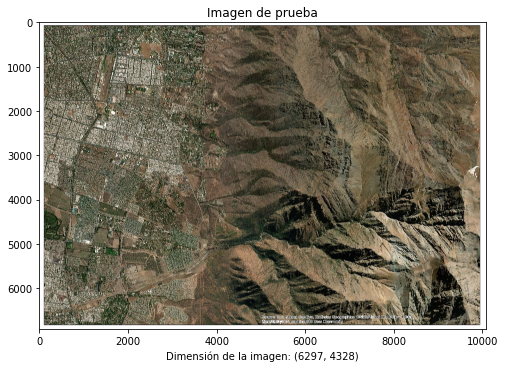

In [7]:
plt.figure(num=1, figsize=(8, 6))
plt.title('Imagen de prueba')
plt.imshow(images[3])
plt.xlabel(f'Dimensión de la imagen: {images[4].size}')
plt.show() # Para no mostrar etiqueta <matplotlib.image.AxesImage at....>

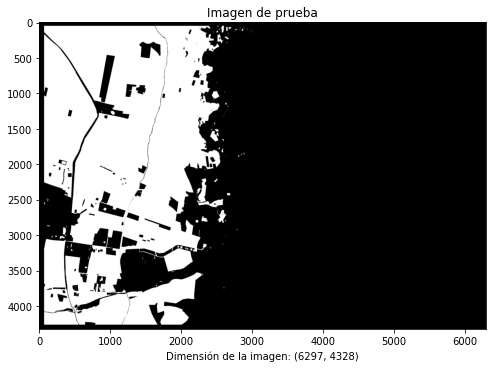

In [8]:
plt.figure(num=1, figsize=(8, 6))
plt.title('Imagen de prueba')
plt.imshow(images[4])
plt.xlabel(f'Dimensión de la imagen: {images[4].size}')
plt.show() # Para no mostrar etiqueta <matplotlib.image.AxesImage at....>

## Gráficamos múltiples imágenes

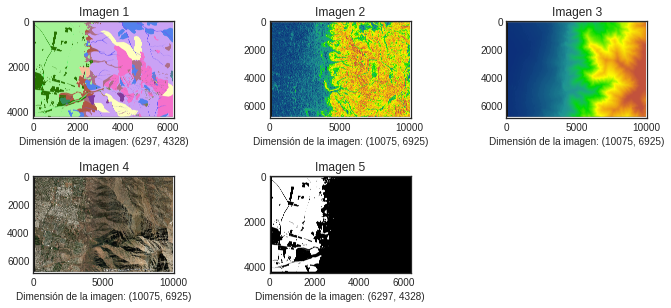

In [9]:
plt.style.use('seaborn-white')
plt.figure(1, figsize=(14,10))

for (idx, img) in enumerate(images[:6]):
    plt.subplot(2, 3, idx+1)
    plt.title(f'Imagen {idx+1}')

    plt.xlabel(f'Dimensión de la imagen: {images[idx].size}')
    plt.imshow(img, cmap='gray')

plt.subplots_adjust(top=0.45, bottom=0.1, left=0.1, right=0.75, wspace=0.3, hspace=0.6) # Importante
plt.show()

## Función para particionar imagen

In [10]:
def crop(path, input, height, width, k, page, area):
    im = Image.open(input)
    imgwidth, imgheight = im.size
    
    for i in range(0,imgheight,height):
        for j in range(0,imgwidth,width):
            box = (j, i, j+width, i+height)
            a = im.crop(box)
            try:
                o = a.crop(area)
                o.save(os.path.join(path,"PNG","%s" % page,"IMG-%s.png" % k))
            except:
                pass
            k +=1

Creamos un directorio llamado CropImages dentro de la carpeta images, en caso de que exista no hacemos nada

In [11]:
if (not os.path.exists('./Images/CropImages')):
    os.mkdir('./Images/CropImages')
    print('Directorio CropImages creado !')

# Establecemos parámetros para las imágenes del dataset
---

Para generar nuestra base de datos debemos configurar tres (o tal vez más) parámetros, estos son:

- `n_images`: corresponde al número de imágenes que contendra nuestro dataset.
- `crop_width`: corresponde al largo o ancho de una imágen particionada.
- `crop_height`: corresponde al alto de una imágen particionada.

In [17]:
width, height = urban_mask.size # Dimensiones de la imagen original
n_images = 100

In [18]:
print(f'Dimensión de la imagen: (width = {width}, height = {height})')

Dimensión de la imagen: (width = 6297, height = 4328)


In [19]:
crop_width  = (width  - 2*72) // n_images      # División entera, no considera el resto.
crop_height = (height - 2*55) // n_images    # División entera, no considera el resto.

print(f'Dimensión imagenes pequeñas: {crop_width}, {crop_height}')

Dimensión imagenes pequeñas: 61, 42


In [21]:
init_left = 72
left      = width - init_left
init_top  = 55
top       = height - init_top

In [22]:
crop_images = []

for y in range(init_top, top, crop_height):
    for x in range(init_left, left, crop_width):
        
        right  = x + crop_width
        bottom = y + crop_height
        
        im = Image.fromarray(urban_numpy[y:bottom, x:right])
        
#         print('-------------------------------------')      
#         print(f'top:  {y}, bottom: {bottom}')
#         print(f'left: {x}, right:  {right}')
#         print('-------------------------------------\n')
        
        crop_images.append(im)
        

In [38]:
len(crop_images)

10201

## Visualizamos una imagen particionada

In [39]:
test_img = crop_images[2500]

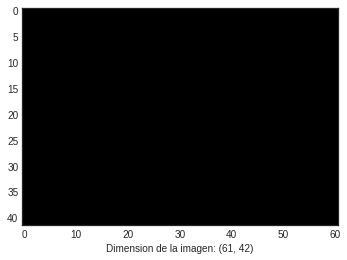

In [40]:
plt.imshow(test_img)
plt.xlabel(f'Dimension de la imagen: {test_img.size}')
plt.show()

Prueba para saber si se guarda bien en git, ahora si estoy usando kernel python 3